Generative AI Applications Project

Name: Sabrina Palis

Dataset: EuroSat Dataset (Kaggle) https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

Repository: https://github.com/MinervaRose/generative-ai-applications

# **1. Generative Task Definition and Approach Selection**

# 1.1 Generative Task Definition

The goal of this project is to train a generative model capable of learning the visual structure of satellite Earth-observation imagery and producing synthetic satellite images that resemble real orbital sensor data. The model learns a compact latent representation of terrain patterns and generates new samples by sampling from this learned latent space.

This task is framed as an image-based generative modeling problem relevant to autonomous aerospace monitoring systems. Modern satellite platforms collect vast amounts of visual data used for terrain classification, environmental monitoring, and anomaly detection. However, real-world systems must operate under uncertainty, including rare geographic patterns or unseen environmental conditions. Generative modeling allows simulation of new sensor inputs that approximate realistic satellite imagery, enabling stress-testing of downstream perception systems.

Rather than memorizing individual images, the model must capture statistical regularities such as texture distributions, spatial structure, and spectral color relationships present in Earth-observation data. The generative system aims to reproduce plausible terrain patterns while preserving structural coherence.

The model therefore functions as a synthetic satellite signal generator that approximates the distribution of real orbital imagery.

# 1.2 Generative Approach Selection

A Variational Autoencoder (VAE) is selected for this task. VAEs are probabilistic generative models that learn a continuous latent space and enable controlled sampling and interpolation between learned representations. This architecture is appropriate because it balances stable training, interpretable latent structure, and efficient sampling — qualities important for analytical evaluation and reproducibility.

Generative Adversarial Networks (GANs) are capable of producing sharper images, but they can suffer from training instability and mode collapse, which complicates systematic analysis of learned representations. For an academic setting focused on understanding generative behavior rather than maximizing visual realism, the VAE provides a more reliable framework.

Transformer-based generative models are better suited for text or sequential data and are not a natural fit for pixel-based image reconstruction. For this reason, a VAE offers the best balance between generative capability, interpretability, and training stability.

This design choice prioritizes transparency and controlled experimentation over architectural complexity.

# 1.3 Dataset Description

The dataset used in this project is the EuroSAT satellite image dataset, publicly available on Kaggle. The dataset contains labeled Sentinel-2 satellite images covering multiple terrain categories such as urban areas, forests, water bodies, farmland, and transportation infrastructure.

Source:
https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

The dataset consists of real satellite observations captured by the Sentinel-2 Earth observation mission. Because the data originates from actual aerospace sensing systems rather than synthetic or AI-generated sources, it provides a realistic and scientifically grounded domain for generative modeling.

Images are resized during preprocessing to a uniform resolution to ensure consistent training while preserving global spatial structure. The dataset is not reused from any prior capstone project and is appropriate for academic experimentation.

# 1.4 Task Summary

In summary, this project implements a Variational Autoencoder that learns the distribution of satellite Earth imagery and generates synthetic orbital observations from a learned latent space. The task demonstrates generative representation learning on aerospace sensor data and provides a foundation for evaluating output quality, model limitations, and responsible use of synthetic satellite imagery.

This work supports the broader theme of autonomous aerospace monitoring by simulating plausible sensor signals for testing and analysis.

# 2. Environment and Data Access Setup

# 2.1. Optional Google Colab Setup
This notebook is designed to run locally or in Colab.

In [7]:
# Optional: Google Colab setup
# Uncomment only if running in Google Colab and using Google Drive storage
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Go to directory
%cd /content/drive/MyDrive/Capstone/generative-ai-applications/

/content/drive/MyDrive/Capstone/generative-ai-applications


### 2.2 Dataset Access Instructions

This project downloads the dataset directly from Kaggle to ensure reproducibility and avoid bundling large files in the submission.

To run this notebook:

* Create a Kaggle account (free)

* Go to Kaggle → Account → Create API Token

* Copy your Kaggle username and API key into the credential cell

* Run the Kaggle authentication cell

* Run the dataset download cell

The notebook will automatically download the EuroSat Dataset (Kaggle) https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

No manual file handling is required.

In [9]:
# Kaggle credentials
import os, json, pathlib

KAGGLE_USERNAME = "YOUR_KAGGLE_USER_NAME"
KAGGLE_KEY = "YOUR_KAGGLE_KEY"

kaggle_json = {
    "username": KAGGLE_USERNAME,
    "key": KAGGLE_KEY
}

kaggle_dir = pathlib.Path("/root/.kaggle")
kaggle_dir.mkdir(parents=True, exist_ok=True)

with open(kaggle_dir / "kaggle.json", "w") as f:
    json.dump(kaggle_json, f)

os.chmod(kaggle_dir / "kaggle.json", 0o600)

print("Kaggle credentials written.")

Kaggle credentials written.


In [10]:
# Install Kaggle API
!pip install kaggle -q

In [11]:
!kaggle datasets list | head

ref                                                             title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
saidaminsaidaxmadov/chocolate-sales                             Chocolate Sales                                       468320  2026-01-04 14:23:35.490000          19049        341  1.0              
aliiihussain/amazon-sales-dataset                               Amazon_Sales_Dataset                                 1297759  2026-02-01 11:37:12.353000           4474         83  1.0              
ayeshasiddiqa123/student-perfirmance                            Student Academic Performance Dataset.                  96178  2026-01-06 12:08:32.540000           7018        131  1.0              
ranaghulam

#### 2.3 Download Dataset

In [12]:
DATA_ROOT = "/content/eurosat"
!mkdir -p $DATA_ROOT

# Download EuroSAT satellite image dataset
!kaggle datasets download -d apollo2506/eurosat-dataset -p $DATA_ROOT --force

# Unzip
!unzip -q $DATA_ROOT/*.zip -d $DATA_ROOT

# Show contents
!ls -R $DATA_ROOT

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Highway_1186.tif  Highway_1749.tif  Highway_2310.tif  Highway_622.tif
Highway_1187.tif  Highway_174.tif   Highway_2311.tif  Highway_623.tif
Highway_1188.tif  Highway_1750.tif  Highway_2312.tif  Highway_624.tif
Highway_1189.tif  Highway_1751.tif  Highway_2313.tif  Highway_625.tif
Highway_118.tif   Highway_1752.tif  Highway_2314.tif  Highway_626.tif
Highway_1190.tif  Highway_1753.tif  Highway_2315.tif  Highway_627.tif
Highway_1191.tif  Highway_1754.tif  Highway_2316.tif  Highway_628.tif
Highway_1192.tif  Highway_1755.tif  Highway_2317.tif  Highway_629.tif
Highway_1193.tif  Highway_1756.tif  Highway_2318.tif  Highway_62.tif
Highway_1194.tif  Highway_1757.tif  Highway_2319.tif  Highway_630.tif
Highway_1195.tif  Highway_1758.tif  Highway_231.tif   Highway_631.tif
Highway_1196.tif  Highway_1759.tif  Highway_2320.tif  Highway_632.tif
Highway_1197.tif  Highway_175.tif   Highway_2321.tif  Highway_633.tif
Highway_1198.

## 2.4 Dataset Extraction Sanity Check

In [13]:
DATA_ROOT = "/content/eurosat"
!pwd
!ls -lah $DATA_ROOT

/content/drive/MyDrive/Capstone/generative-ai-applications
total 2.1G
drwxr-xr-x  4 root root 4.0K Feb 13 15:19 .
drwxr-xr-x  1 root root 4.0K Feb 13 15:19 ..
drwxr-xr-x 12 root root 4.0K Feb 13 15:19 EuroSAT
drwxr-xr-x 12 root root 4.0K Feb 13 15:20 EuroSATallBands
-rw-r--r--  1 root root 2.1G Nov 20  2020 eurosat-dataset.zip


In [14]:
!find $DATA_ROOT -maxdepth 1 -type d -print

/content/eurosat
/content/eurosat/EuroSAT
/content/eurosat/EuroSATallBands


In [15]:
!find $DATA_ROOT -maxdepth 2 -type d -print | head -n 50

/content/eurosat
/content/eurosat/EuroSAT
/content/eurosat/EuroSAT/HerbaceousVegetation
/content/eurosat/EuroSAT/AnnualCrop
/content/eurosat/EuroSAT/Pasture
/content/eurosat/EuroSAT/Highway
/content/eurosat/EuroSAT/Forest
/content/eurosat/EuroSAT/SeaLake
/content/eurosat/EuroSAT/PermanentCrop
/content/eurosat/EuroSAT/River
/content/eurosat/EuroSAT/Residential
/content/eurosat/EuroSAT/Industrial
/content/eurosat/EuroSATallBands
/content/eurosat/EuroSATallBands/HerbaceousVegetation
/content/eurosat/EuroSATallBands/AnnualCrop
/content/eurosat/EuroSATallBands/Pasture
/content/eurosat/EuroSATallBands/Highway
/content/eurosat/EuroSATallBands/Forest
/content/eurosat/EuroSATallBands/SeaLake
/content/eurosat/EuroSATallBands/PermanentCrop
/content/eurosat/EuroSATallBands/River
/content/eurosat/EuroSATallBands/Residential
/content/eurosat/EuroSATallBands/Industrial


In [16]:
!find $DATA_ROOT -type f -name "*.tif" | head -n 20

/content/eurosat/EuroSATallBands/HerbaceousVegetation/HerbaceousVegetation_2961.tif
/content/eurosat/EuroSATallBands/HerbaceousVegetation/HerbaceousVegetation_2370.tif
/content/eurosat/EuroSATallBands/HerbaceousVegetation/HerbaceousVegetation_1087.tif
/content/eurosat/EuroSATallBands/HerbaceousVegetation/HerbaceousVegetation_2520.tif
/content/eurosat/EuroSATallBands/HerbaceousVegetation/HerbaceousVegetation_150.tif
/content/eurosat/EuroSATallBands/HerbaceousVegetation/HerbaceousVegetation_2889.tif
/content/eurosat/EuroSATallBands/HerbaceousVegetation/HerbaceousVegetation_455.tif
/content/eurosat/EuroSATallBands/HerbaceousVegetation/HerbaceousVegetation_2130.tif
/content/eurosat/EuroSATallBands/HerbaceousVegetation/HerbaceousVegetation_2902.tif
/content/eurosat/EuroSATallBands/HerbaceousVegetation/HerbaceousVegetation_1645.tif
/content/eurosat/EuroSATallBands/HerbaceousVegetation/HerbaceousVegetation_262.tif
/content/eurosat/EuroSATallBands/HerbaceousVegetation/HerbaceousVegetation_786.

In [17]:
!find $DATA_ROOT -type f -name "*.tif" | wc -l

27597


In [18]:
!find $DATA_ROOT -type f -name "*.jpg" | head -n 10

/content/eurosat/EuroSAT/HerbaceousVegetation/HerbaceousVegetation_1207.jpg
/content/eurosat/EuroSAT/HerbaceousVegetation/HerbaceousVegetation_139.jpg
/content/eurosat/EuroSAT/HerbaceousVegetation/HerbaceousVegetation_354.jpg
/content/eurosat/EuroSAT/HerbaceousVegetation/HerbaceousVegetation_1838.jpg
/content/eurosat/EuroSAT/HerbaceousVegetation/HerbaceousVegetation_2280.jpg
/content/eurosat/EuroSAT/HerbaceousVegetation/HerbaceousVegetation_1096.jpg
/content/eurosat/EuroSAT/HerbaceousVegetation/HerbaceousVegetation_532.jpg
/content/eurosat/EuroSAT/HerbaceousVegetation/HerbaceousVegetation_552.jpg
/content/eurosat/EuroSAT/HerbaceousVegetation/HerbaceousVegetation_2655.jpg
/content/eurosat/EuroSAT/HerbaceousVegetation/HerbaceousVegetation_2617.jpg


In [19]:
!find $DATA_ROOT -type f -name "*.jpg" | wc -l

27000


Before loading the dataset into PyTorch, the filesystem is inspected to confirm that the Kaggle archive was extracted correctly. Directory listings verify the presence of two EuroSAT variants: (1) an RGB subset stored as `.jpg` images under `EuroSAT/`, and (2) an all-bands Sentinel-2 subset stored as `.tif` files under `EuroSATallBands/`. Both variants are organized into terrain-specific class folders.

A recursive search is used to confirm that image files are present and to validate the overall sample count. For this project, the RGB `EuroSAT/` subset is selected to keep inputs consistent with a standard 3-channel convolutional VAE and to minimize additional band-specific preprocessing. This sanity check prevents path and format errors and ensures subsequent data loading steps operate on a correctly structured dataset.


### 2.5 Library Setup
This section imports the Python libraries required for data loading, visualization, and generative model training. PyTorch provides the neural network framework, torchvision supports image preprocessing, and auxiliary libraries handle dataset inspection and visualization. These tools form the foundation of the Variational Autoencoder pipeline implemented in later sections.

In [20]:
# Core Python utilities
import os
import numpy as np

# PyTorch framework
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Torchvision for image preprocessing
import torchvision
from torchvision import transforms
from torchvision.utils import make_grid

# Image handling
from PIL import Image

# Visualization
import matplotlib.pyplot as plt

# Progress bars
from tqdm import tqdm

In [21]:
# Device check
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# **3. Data Loading and Inspection**

In this section, the EuroSAT satellite image dataset is verified, loaded, and inspected to understand its structure before training a generative model. A preliminary filesystem sanity check confirms that the Kaggle archive was extracted correctly and that the dataset directories contain accessible satellite images organized by terrain category.

The EuroSAT dataset includes both an RGB subset stored as `.jpg` files and a multi-band Sentinel-2 subset stored as `.tif` files. For this project, the RGB subset is selected to maintain a consistent 3-channel input format compatible with convolutional generative architectures. A custom PyTorch dataset class is implemented to read these images and convert them into tensors suitable for neural network training.

Representative image samples are displayed to verify that the dataset loads correctly and to visually inspect terrain patterns present in the data. Batch statistics such as tensor shape, pixel ranges, and channel structure are examined to confirm compatibility with the Variational Autoencoder pipeline.

A preprocessing pipeline resizes all images to a consistent 64×64 resolution and converts them into normalized RGB tensors. This ensures stable training behavior and consistent input formatting for the generative model implemented in later sections.

This inspection step validates the integrity of the dataset and clarifies how raw satellite imagery flows into the generative modeling pipeline.


## 3.1 Define EuroSAT dataset loader

To load the dataset in PyTorch, we implement a custom `Dataset` class that:
- enumerates class subdirectories,
- collects image file paths with valid extensions (e.g., `.jpg`),
- returns `(image_tensor, label)` pairs after applying the preprocessing transform.

This makes the data pipeline explicit and ensures consistent input formatting for training.


In [22]:
DATA_ROOT = "/content/eurosat"
DATA_DIR = os.path.join(DATA_ROOT, "EuroSAT")  # RGB jpg images

class EuroSATDataset(Dataset):
    def __init__(self, root_dir, transform=None, exts=(".jpg", ".jpeg", ".png")):
        self.root_dir = root_dir
        self.transform = transform
        self.exts = tuple(e.lower() for e in exts)

        self.classes = sorted([
            d for d in os.listdir(root_dir)
            if os.path.isdir(os.path.join(root_dir, d))
        ])

        self.image_paths = []
        self.labels = []

        for label_idx, class_name in enumerate(self.classes):
            class_path = os.path.join(root_dir, class_name)
            for fname in os.listdir(class_path):
                fpath = os.path.join(class_path, fname)
                if os.path.isfile(fpath) and fname.lower().endswith(self.exts):
                    self.image_paths.append(fpath)
                    self.labels.append(label_idx)

        if len(self.image_paths) == 0:
            raise ValueError(
                f"No image files found under {root_dir} with extensions {self.exts}. "
                f"Check dataset extraction and folder structure."
            )

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        with Image.open(self.image_paths[idx]) as im:
          img = im.convert("RGB")
        label = self.labels[idx]
        if self.transform:
            img = self.transform(img)
        return img, label

In [24]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),  # scales to [0, 1]
])

In [25]:
dataset = EuroSATDataset(DATA_DIR, transform=transform)
print("Dataset size:", len(dataset))
print("Num classes:", len(dataset.classes))
print("Classes:", dataset.classes)
print("Example file:", dataset.image_paths[0])

Dataset size: 27000
Num classes: 10
Classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
Example file: /content/eurosat/EuroSAT/AnnualCrop/AnnualCrop_192.jpg


## 3.2 Display representative sequences


#### Representative Samples and Input Validation

To verify that the dataset loads correctly, a small batch of images is visualized. We also inspect tensor shapes, data types, and pixel ranges after preprocessing to confirm that inputs flow into the model as normalized 3×64×64 RGB tensors suitable for a convolutional VAE.


### DataLoader + visualization

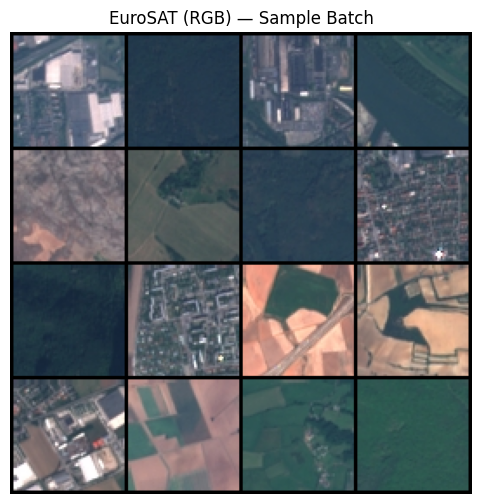

In [26]:
loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2, pin_memory=True)

images, labels = next(iter(loader))

grid = make_grid(images, nrow=4)
plt.figure(figsize=(6, 6))
plt.imshow(grid.permute(1, 2, 0))
plt.axis("off")
plt.title("EuroSAT (RGB) — Sample Batch")
plt.show()

### shape and range inspection

In [27]:
print("Batch shape:", images.shape)          # expected: [16, 3, 64, 64]
print("dtype:", images.dtype)                # expected: torch.float32
print("min/max:", images.min().item(), images.max().item())  # expected: ~0.0 to 1.0
print("labels:", labels.tolist())

Batch shape: torch.Size([16, 3, 64, 64])
dtype: torch.float32
min/max: 0.07058823853731155 1.0
labels: [4, 1, 4, 8, 2, 5, 1, 7, 1, 7, 3, 6, 4, 0, 5, 1]


**Preprocessing considerations:**  
EuroSAT RGB images are loaded with PIL and converted to a consistent 3-channel RGB format. Images are resized to 64×64 and converted to PyTorch tensors using `ToTensor()`, which scales pixel values to the [0, 1] range. Batch inspection confirms that inputs enter the model as float32 tensors with shape `[batch_size, 3, 64, 64]`, matching the expected format for a convolutional Variational Autoencoder. This consistent normalization and tensor structure supports stable training and correct decoder reconstruction.


# **4. Implementing and Training a Generative Model**

## 4.1 VAE Implementation and Training

A convolutional Variational Autoencoder (VAE) is used to model the distribution of 64×64 RGB satellite images. The encoder compresses each image into a 128-dimensional latent vector parameterized by a mean and log-variance, enabling stochastic sampling via the reparameterization trick. The decoder reconstructs images from sampled latent vectors to produce synthetic satellite imagery.

**Key design choices:**
- **Convolutional encoder/decoder:** preserves spatial structure and is well-suited for image data.
- **Latent dimension (128):** increases representational capacity compared to smaller bottlenecks, improving reconstruction fidelity while maintaining a structured latent space.
- **β-VAE objective (β = 0.1):** reduces KL pressure so the model prioritizes reconstruction quality while still regularizing the latent distribution.
- **Reconstruction loss (MSE):** treats pixels as continuous intensities, which improves texture preservation compared to binary cross-entropy for natural imagery.
- **Output activation:** sigmoid output with inputs scaled to the [0, 1] range to match the preprocessing pipeline.


## 4.2 VAE architecture

In [28]:
import torch
import torch.nn as nn

class ConvVAE(nn.Module):
    def __init__(self, latent_dim=64):
        super().__init__()
        self.latent_dim = latent_dim

        # Encoder: [3,64,64] → [256,4,4]
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 4, 2, 1),  # 32×32×32
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1), # 64×16×16
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),# 128×8×8
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1),# 256×4×4
            nn.ReLU(),
        )

        self.flatten_dim = 256 * 4 * 4

        # Latent space
        self.fc_mu = nn.Linear(self.flatten_dim, latent_dim)
        self.fc_logvar = nn.Linear(self.flatten_dim, latent_dim)

        # Decoder
        self.fc_dec = nn.Linear(latent_dim, self.flatten_dim)

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 4, 2, 1), # 128×8×8
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),  # 64×16×16
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),   # 32×32×32
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, 4, 2, 1),    # 3×64×64
            nn.Sigmoid()
        )

    def encode(self, x):
        h = self.encoder(x)
        h = h.view(x.size(0), -1)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = self.fc_dec(z)
        h = h.view(z.size(0), 256, 4, 4)
        return self.decoder(h)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z)
        return x_recon, mu, logvar


In [29]:
model = ConvVAE(latent_dim=64)
print(model)

ConvVAE(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
  )
  (fc_mu): Linear(in_features=4096, out_features=64, bias=True)
  (fc_logvar): Linear(in_features=4096, out_features=64, bias=True)
  (fc_dec): Linear(in_features=64, out_features=4096, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(2, 2), padd

## 4.3 Loss function and optimizer


In [30]:
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = ConvVAE(latent_dim=128).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

def vae_loss(recon_x, x, mu, logvar, beta=0.1):
    recon_loss = F.mse_loss(recon_x, x, reduction="sum")
    kl = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + beta * kl, recon_loss, kl

Using device: cuda


## 4. 4 Training loop



In [31]:
# Adding train/val split for early stopping
from torch.utils.data import random_split

torch.manual_seed(42)

val_ratio = 0.1
val_size = int(len(dataset) * val_ratio)
train_size = len(dataset) - val_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2, pin_memory=True)

print("Train size:", len(train_dataset))
print("Val size:", len(val_dataset))

Train size: 24300
Val size: 2700


In [32]:
# Early-stopping training loop (saves best model automatically)
CKPT_PATH = "/content/drive/MyDrive/Capstone/generative-ai-applications/best_vae_eurosat.pt"

def evaluate_vae(model, loader):
    model.eval()
    total_loss = total_recon = total_kl = 0.0
    with torch.no_grad():
        for x, _ in loader:
            x = x.to(device)
            x_recon, mu, logvar = model(x)
            loss, recon_loss, kl = vae_loss(x_recon, x, mu, logvar)
            total_loss += loss.item()
            total_recon += recon_loss.item()
            total_kl += kl.item()

    n = len(loader.dataset)
    return total_loss / n, total_recon / n, total_kl / n


def train_vae_early_stop(model, train_loader, val_loader, optimizer, max_epochs=50, patience=5):
    history = {
        "train_total": [], "train_recon": [], "train_kl": [],
        "val_total": [], "val_recon": [], "val_kl": []
    }

    best_val = float("inf")
    epochs_no_improve = 0

    for epoch in range(1, max_epochs + 1):
        model.train()
        train_total = train_recon = train_kl = 0.0

        pbar = tqdm(train_loader, desc=f"Epoch {epoch}/{max_epochs}")
        for x, _ in pbar:
            x = x.to(device)
            optimizer.zero_grad()

            x_recon, mu, logvar = model(x)
            loss, recon_loss, kl = vae_loss(x_recon, x, mu, logvar)
            loss.backward()
            optimizer.step()

            train_total += loss.item()
            train_recon += recon_loss.item()
            train_kl += kl.item()

            pbar.set_postfix({"loss": loss.item() / x.size(0)})

        n_train = len(train_loader.dataset)
        train_total /= n_train
        train_recon /= n_train
        train_kl /= n_train

        val_total, val_recon, val_kl = evaluate_vae(model, val_loader)

        history["train_total"].append(train_total)
        history["train_recon"].append(train_recon)
        history["train_kl"].append(train_kl)
        history["val_total"].append(val_total)
        history["val_recon"].append(val_recon)
        history["val_kl"].append(val_kl)

        print(
            f"Epoch {epoch}: "
            f"train_total={train_total:.4f}, val_total={val_total:.4f} | "
            f"train_recon={train_recon:.4f}, val_recon={val_recon:.4f} | "
            f"train_kl={train_kl:.4f}, val_kl={val_kl:.4f}"
        )

        # Checkpoint + early stopping logic
        if val_total < best_val:
            best_val = val_total
            epochs_no_improve = 0
            torch.save({
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "best_val_loss": best_val,
                "history": history,
            }, CKPT_PATH)
            print(f"✅ Saved best checkpoint (val_total={best_val:.4f})")
        else:
            epochs_no_improve += 1
            print(f"No improvement for {epochs_no_improve} epoch(s).")

        if epochs_no_improve >= patience:
            print(f"⏹ Early stopping triggered (patience={patience}). Best val_total={best_val:.4f}")
            break

    return history

In [33]:
# Run
history = train_vae_early_stop(model, train_loader, val_loader, optimizer, max_epochs=50, patience=5)

Epoch 1/50: 100%|██████████| 190/190 [00:12<00:00, 15.60it/s, loss=90.8]


Epoch 1: train_total=145.8929, val_total=95.5805 | train_recon=141.7551, val_recon=90.8114 | train_kl=41.3786, val_kl=47.6914
✅ Saved best checkpoint (val_total=95.5805)


Epoch 2/50: 100%|██████████| 190/190 [00:11<00:00, 16.45it/s, loss=81.8]


Epoch 2: train_total=83.9017, val_total=80.2300 | train_recon=79.0351, val_recon=75.2145 | train_kl=48.6667, val_kl=50.1558
✅ Saved best checkpoint (val_total=80.2300)


Epoch 3/50: 100%|██████████| 190/190 [00:11<00:00, 16.85it/s, loss=59]


Epoch 3: train_total=73.3695, val_total=71.0649 | train_recon=68.2506, val_recon=65.5622 | train_kl=51.1895, val_kl=55.0273
✅ Saved best checkpoint (val_total=71.0649)


Epoch 4/50: 100%|██████████| 190/190 [00:11<00:00, 16.65it/s, loss=66.3]


Epoch 4: train_total=65.0426, val_total=63.8157 | train_recon=59.1759, val_recon=57.6681 | train_kl=58.6671, val_kl=61.4761
✅ Saved best checkpoint (val_total=63.8157)


Epoch 5/50: 100%|██████████| 190/190 [00:11<00:00, 16.76it/s, loss=57.8]


Epoch 5: train_total=59.9944, val_total=60.3974 | train_recon=53.7423, val_recon=53.7170 | train_kl=62.5212, val_kl=66.8042
✅ Saved best checkpoint (val_total=60.3974)


Epoch 6/50: 100%|██████████| 190/190 [00:11<00:00, 16.15it/s, loss=50.8]


Epoch 6: train_total=57.3087, val_total=58.0738 | train_recon=50.7522, val_recon=51.3580 | train_kl=65.5648, val_kl=67.1573
✅ Saved best checkpoint (val_total=58.0738)


Epoch 7/50: 100%|██████████| 190/190 [00:09<00:00, 20.21it/s, loss=55.2]


Epoch 7: train_total=55.4869, val_total=57.4137 | train_recon=48.6824, val_recon=50.4067 | train_kl=68.0445, val_kl=70.0695
✅ Saved best checkpoint (val_total=57.4137)


Epoch 8/50: 100%|██████████| 190/190 [00:09<00:00, 19.84it/s, loss=55.3]


Epoch 8: train_total=53.7917, val_total=55.5047 | train_recon=46.8227, val_recon=48.3075 | train_kl=69.6897, val_kl=71.9719
✅ Saved best checkpoint (val_total=55.5047)


Epoch 9/50: 100%|██████████| 190/190 [00:10<00:00, 18.15it/s, loss=53.4]


Epoch 9: train_total=52.4956, val_total=54.1905 | train_recon=45.4874, val_recon=47.0478 | train_kl=70.0821, val_kl=71.4272
✅ Saved best checkpoint (val_total=54.1905)


Epoch 10/50: 100%|██████████| 190/190 [00:11<00:00, 17.06it/s, loss=55.6]


Epoch 10: train_total=51.6150, val_total=53.4139 | train_recon=44.5561, val_recon=46.3251 | train_kl=70.5893, val_kl=70.8877
✅ Saved best checkpoint (val_total=53.4139)


Epoch 11/50: 100%|██████████| 190/190 [00:11<00:00, 16.43it/s, loss=36.5]


Epoch 11: train_total=50.5789, val_total=52.1553 | train_recon=43.4704, val_recon=44.8313 | train_kl=71.0842, val_kl=73.2402
✅ Saved best checkpoint (val_total=52.1553)


Epoch 12/50: 100%|██████████| 190/190 [00:11<00:00, 16.61it/s, loss=53.7]


Epoch 12: train_total=49.6482, val_total=52.1811 | train_recon=42.4723, val_recon=45.2614 | train_kl=71.7590, val_kl=69.1970
No improvement for 1 epoch(s).


Epoch 13/50: 100%|██████████| 190/190 [00:12<00:00, 15.50it/s, loss=47.9]


Epoch 13: train_total=49.1232, val_total=51.3022 | train_recon=41.8758, val_recon=43.8554 | train_kl=72.4745, val_kl=74.4675
✅ Saved best checkpoint (val_total=51.3022)


Epoch 14/50: 100%|██████████| 190/190 [00:10<00:00, 17.57it/s, loss=41.7]


Epoch 14: train_total=48.3328, val_total=51.2241 | train_recon=41.0364, val_recon=43.8743 | train_kl=72.9646, val_kl=73.4989
✅ Saved best checkpoint (val_total=51.2241)


Epoch 15/50: 100%|██████████| 190/190 [00:11<00:00, 16.44it/s, loss=48.7]


Epoch 15: train_total=48.1000, val_total=50.6741 | train_recon=40.7348, val_recon=43.0024 | train_kl=73.6529, val_kl=76.7176
✅ Saved best checkpoint (val_total=50.6741)


Epoch 16/50: 100%|██████████| 190/190 [00:09<00:00, 20.42it/s, loss=47.4]


Epoch 16: train_total=47.5808, val_total=50.2428 | train_recon=40.1329, val_recon=42.6139 | train_kl=74.4791, val_kl=76.2886
✅ Saved best checkpoint (val_total=50.2428)


Epoch 17/50: 100%|██████████| 190/190 [00:10<00:00, 18.48it/s, loss=49.2]


Epoch 17: train_total=47.1532, val_total=50.4252 | train_recon=39.6237, val_recon=42.7777 | train_kl=75.2943, val_kl=76.4748
No improvement for 1 epoch(s).


Epoch 18/50: 100%|██████████| 190/190 [00:11<00:00, 15.92it/s, loss=44.8]


Epoch 18: train_total=46.5644, val_total=49.9857 | train_recon=38.9762, val_recon=42.2497 | train_kl=75.8828, val_kl=77.3604
✅ Saved best checkpoint (val_total=49.9857)


Epoch 19/50: 100%|██████████| 190/190 [00:11<00:00, 16.86it/s, loss=49.6]


Epoch 19: train_total=46.0552, val_total=49.5138 | train_recon=38.4067, val_recon=41.6611 | train_kl=76.4854, val_kl=78.5271
✅ Saved best checkpoint (val_total=49.5138)


Epoch 20/50: 100%|██████████| 190/190 [00:12<00:00, 15.53it/s, loss=46.3]


Epoch 20: train_total=46.0647, val_total=49.3758 | train_recon=38.3595, val_recon=41.5230 | train_kl=77.0526, val_kl=78.5281
✅ Saved best checkpoint (val_total=49.3758)


Epoch 21/50: 100%|██████████| 190/190 [00:12<00:00, 15.43it/s, loss=42.7]


Epoch 21: train_total=45.3266, val_total=49.1057 | train_recon=37.6049, val_recon=41.2033 | train_kl=77.2173, val_kl=79.0236
✅ Saved best checkpoint (val_total=49.1057)


Epoch 22/50: 100%|██████████| 190/190 [00:12<00:00, 15.47it/s, loss=49.8]


Epoch 22: train_total=44.9977, val_total=49.3595 | train_recon=37.2613, val_recon=41.3182 | train_kl=77.3634, val_kl=80.4128
No improvement for 1 epoch(s).


Epoch 23/50: 100%|██████████| 190/190 [00:11<00:00, 16.67it/s, loss=44.1]


Epoch 23: train_total=44.7587, val_total=48.7886 | train_recon=37.0188, val_recon=41.0624 | train_kl=77.3995, val_kl=77.2615
✅ Saved best checkpoint (val_total=48.7886)


Epoch 24/50: 100%|██████████| 190/190 [00:10<00:00, 17.79it/s, loss=45.5]


Epoch 24: train_total=44.1034, val_total=49.4436 | train_recon=36.3415, val_recon=41.8200 | train_kl=77.6185, val_kl=76.2361
No improvement for 1 epoch(s).


Epoch 25/50: 100%|██████████| 190/190 [00:09<00:00, 20.23it/s, loss=44.7]


Epoch 25: train_total=43.5464, val_total=48.3106 | train_recon=35.8026, val_recon=40.6596 | train_kl=77.4381, val_kl=76.5105
✅ Saved best checkpoint (val_total=48.3106)


Epoch 26/50: 100%|██████████| 190/190 [00:10<00:00, 18.63it/s, loss=47.9]


Epoch 26: train_total=43.3527, val_total=48.1579 | train_recon=35.6182, val_recon=40.3371 | train_kl=77.3451, val_kl=78.2080
✅ Saved best checkpoint (val_total=48.1579)


Epoch 27/50: 100%|██████████| 190/190 [00:10<00:00, 17.43it/s, loss=46.9]


Epoch 27: train_total=43.1090, val_total=48.1856 | train_recon=35.3441, val_recon=40.3119 | train_kl=77.6492, val_kl=78.7364
No improvement for 1 epoch(s).


Epoch 28/50: 100%|██████████| 190/190 [00:12<00:00, 15.33it/s, loss=41.5]


Epoch 28: train_total=42.7167, val_total=48.1306 | train_recon=34.9130, val_recon=40.3164 | train_kl=78.0364, val_kl=78.1418
✅ Saved best checkpoint (val_total=48.1306)


Epoch 29/50: 100%|██████████| 190/190 [00:12<00:00, 15.07it/s, loss=49.7]


Epoch 29: train_total=42.6567, val_total=48.0976 | train_recon=34.8160, val_recon=40.1665 | train_kl=78.4073, val_kl=79.3116
✅ Saved best checkpoint (val_total=48.0976)


Epoch 30/50: 100%|██████████| 190/190 [00:11<00:00, 17.26it/s, loss=43]


Epoch 30: train_total=42.1025, val_total=48.3177 | train_recon=34.2346, val_recon=40.2234 | train_kl=78.6797, val_kl=80.9427
No improvement for 1 epoch(s).


Epoch 31/50: 100%|██████████| 190/190 [00:12<00:00, 15.69it/s, loss=42.3]


Epoch 31: train_total=41.8130, val_total=47.9911 | train_recon=33.9007, val_recon=39.8866 | train_kl=79.1233, val_kl=81.0454
✅ Saved best checkpoint (val_total=47.9911)


Epoch 32/50: 100%|██████████| 190/190 [00:12<00:00, 15.45it/s, loss=40.3]


Epoch 32: train_total=41.8519, val_total=47.9771 | train_recon=33.9192, val_recon=39.6941 | train_kl=79.3268, val_kl=82.8296
✅ Saved best checkpoint (val_total=47.9771)


Epoch 33/50: 100%|██████████| 190/190 [00:10<00:00, 18.88it/s, loss=46.3]


Epoch 33: train_total=41.5651, val_total=48.2054 | train_recon=33.5959, val_recon=40.3610 | train_kl=79.6919, val_kl=78.4443
No improvement for 1 epoch(s).


Epoch 34/50: 100%|██████████| 190/190 [00:11<00:00, 17.26it/s, loss=38.5]


Epoch 34: train_total=41.6302, val_total=48.2767 | train_recon=33.6211, val_recon=39.9773 | train_kl=80.0906, val_kl=82.9938
No improvement for 2 epoch(s).


Epoch 35/50: 100%|██████████| 190/190 [00:10<00:00, 17.81it/s, loss=33.6]


Epoch 35: train_total=41.2396, val_total=47.8949 | train_recon=33.2035, val_recon=39.5210 | train_kl=80.3615, val_kl=83.7385
✅ Saved best checkpoint (val_total=47.8949)


Epoch 36/50: 100%|██████████| 190/190 [00:11<00:00, 17.18it/s, loss=42.5]


Epoch 36: train_total=40.9443, val_total=48.0766 | train_recon=32.8806, val_recon=39.7862 | train_kl=80.6370, val_kl=82.9040
No improvement for 1 epoch(s).


Epoch 37/50: 100%|██████████| 190/190 [00:12<00:00, 15.36it/s, loss=39.1]


Epoch 37: train_total=41.1062, val_total=47.8750 | train_recon=33.0262, val_recon=39.5366 | train_kl=80.7993, val_kl=83.3847
✅ Saved best checkpoint (val_total=47.8750)


Epoch 38/50: 100%|██████████| 190/190 [00:11<00:00, 16.67it/s, loss=42.1]


Epoch 38: train_total=40.5775, val_total=47.9989 | train_recon=32.4650, val_recon=39.7217 | train_kl=81.1254, val_kl=82.7726
No improvement for 1 epoch(s).


Epoch 39/50: 100%|██████████| 190/190 [00:10<00:00, 17.34it/s, loss=42.2]


Epoch 39: train_total=40.7311, val_total=47.7551 | train_recon=32.5920, val_recon=39.3723 | train_kl=81.3913, val_kl=83.8285
✅ Saved best checkpoint (val_total=47.7551)


Epoch 40/50: 100%|██████████| 190/190 [00:09<00:00, 19.32it/s, loss=39.4]


Epoch 40: train_total=40.5221, val_total=47.9948 | train_recon=32.3594, val_recon=39.7585 | train_kl=81.6267, val_kl=82.3635
No improvement for 1 epoch(s).


Epoch 41/50: 100%|██████████| 190/190 [00:10<00:00, 18.52it/s, loss=46.6]


Epoch 41: train_total=40.2147, val_total=49.8657 | train_recon=32.0294, val_recon=41.5796 | train_kl=81.8527, val_kl=82.8605
No improvement for 2 epoch(s).


Epoch 42/50: 100%|██████████| 190/190 [00:11<00:00, 17.12it/s, loss=37.5]


Epoch 42: train_total=40.4721, val_total=48.1252 | train_recon=32.2564, val_recon=39.7942 | train_kl=82.1568, val_kl=83.3097
No improvement for 3 epoch(s).


Epoch 43/50: 100%|██████████| 190/190 [00:11<00:00, 16.95it/s, loss=41.7]


Epoch 43: train_total=40.0903, val_total=48.2353 | train_recon=31.8613, val_recon=39.8260 | train_kl=82.2898, val_kl=84.0925
No improvement for 4 epoch(s).


Epoch 44/50: 100%|██████████| 190/190 [00:11<00:00, 17.08it/s, loss=44.6]


Epoch 44: train_total=39.8217, val_total=47.7871 | train_recon=31.5632, val_recon=39.4119 | train_kl=82.5853, val_kl=83.7523
No improvement for 5 epoch(s).
⏹ Early stopping triggered (patience=5). Best val_total=47.7551


## 4.5 Load the best checkpoint and get history

In [35]:
CKPT_PATH = "/content/drive/MyDrive/Capstone/generative-ai-applications/best_vae_eurosat.pt"

ckpt = torch.load(CKPT_PATH, map_location=device)
model.load_state_dict(ckpt["model_state_dict"])
print("Loaded best checkpoint from epoch:", ckpt["epoch"])
history = ckpt["history"]

Loaded best checkpoint from epoch: 39


## 4.6 Plot training diagnostics

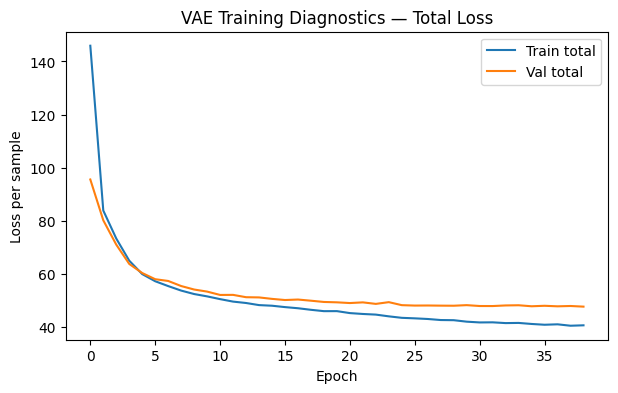

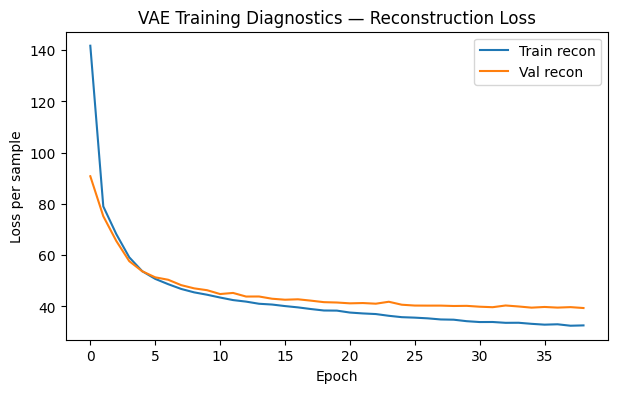

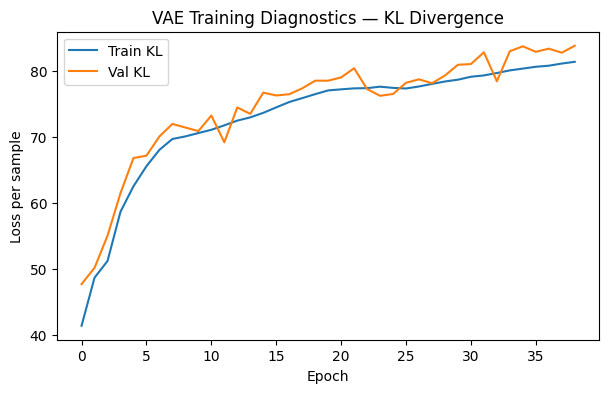

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(history["train_total"], label="Train total")
plt.plot(history["val_total"], label="Val total")
plt.xlabel("Epoch")
plt.ylabel("Loss per sample")
plt.title("VAE Training Diagnostics — Total Loss")
plt.legend()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(history["train_recon"], label="Train recon")
plt.plot(history["val_recon"], label="Val recon")
plt.xlabel("Epoch")
plt.ylabel("Loss per sample")
plt.title("VAE Training Diagnostics — Reconstruction Loss")
plt.legend()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(history["train_kl"], label="Train KL")
plt.plot(history["val_kl"], label="Val KL")
plt.xlabel("Epoch")
plt.ylabel("Loss per sample")
plt.title("VAE Training Diagnostics — KL Divergence")
plt.legend()
plt.show()


## 4.7 Training Diagnostics

Training progress is evaluated using epoch-level curves for total loss, reconstruction loss, and KL divergence on both the training and validation splits. The model uses a 128-dimensional latent space, which increases representational capacity compared to smaller bottlenecks and improves reconstruction fidelity while preserving generative structure.

The total and reconstruction losses decrease rapidly during early epochs and then gradually plateau, indicating stable convergence without numerical instability. A consistent gap between training and validation loss appears after convergence, suggesting mild overfitting typical of pixel-level reconstruction models. Early stopping based on validation loss halts training at epoch 44 and selects the best-performing checkpoint from epoch 39 automatically.

The KL divergence increases steadily during training and stabilizes at higher values, reflecting active use of the latent space. Because a reduced KL weight (β < 1) is used, the model prioritizes reconstruction fidelity while still maintaining a structured latent distribution. This balance improves visual sharpness while preserving generative behavior.

Overall, the diagnostics confirm stable optimization, an active latent space (no collapse), and successful early stopping with reproducible checkpointing.


## 4.8 Reload best model

In [37]:
CKPT_PATH = "/content/drive/MyDrive/Capstone/generative-ai-applications/best_vae_eurosat.pt"

ckpt = torch.load(CKPT_PATH, map_location=device)
model.load_state_dict(ckpt["model_state_dict"])
model.eval()

print(f"✅ Loaded best checkpoint from epoch {ckpt['epoch']} (best_val_loss={ckpt['best_val_loss']:.4f})")


✅ Loaded best checkpoint from epoch 39 (best_val_loss=47.7551)


# **5. Generating and Evaluating Outputs**

This section evaluates the trained VAE by (1) reconstructing real EuroSAT images and (2) generating new synthetic satellite images by sampling from the learned latent space.

Multiple examples are displayed to assess visual plausibility, spatial coherence (e.g., textures and region structure), and diversity across samples.

A qualitative discussion highlights strengths (e.g., capturing broad land-cover textures and color distributions) and failure cases (e.g., blur, weak edges, or mixed terrain patterns), which are common limitations of VAEs trained with pixel-level reconstruction objectives.


## 5.1 Reconstructions: real vs reconstructed

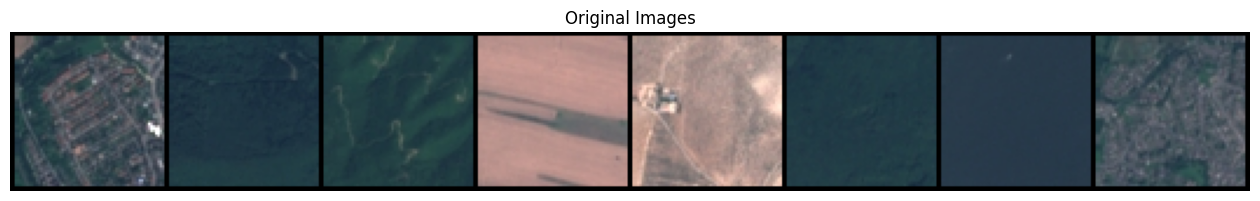

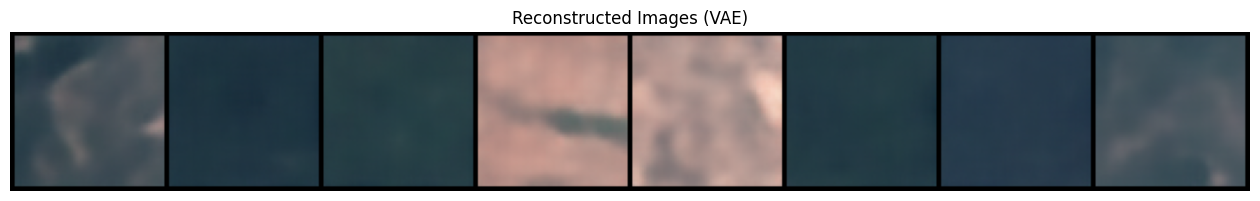

In [38]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

# Grab a batch from validation loader if available, else from main loader
try:
    x, y = next(iter(val_loader))
except NameError:
    x, y = next(iter(loader))

x = x.to(device)

with torch.no_grad():
    x_recon, _, _ = model(x)

# Show first N images: originals and reconstructions
N = 8
orig_grid = make_grid(x[:N].cpu(), nrow=N)
recon_grid = make_grid(x_recon[:N].cpu(), nrow=N)

plt.figure(figsize=(16, 3))
plt.imshow(orig_grid.permute(1, 2, 0))
plt.axis("off")
plt.title("Original Images")
plt.show()

plt.figure(figsize=(16, 3))
plt.imshow(recon_grid.permute(1, 2, 0))
plt.axis("off")
plt.title("Reconstructed Images (VAE)")
plt.show()

## 5.2 Generate new synthetic samples

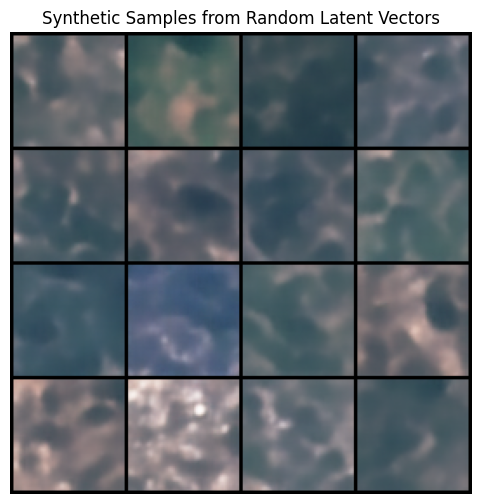

In [39]:
with torch.no_grad():
    z = torch.randn(16, model.latent_dim).to(device)
    samples = model.decode(z).cpu()

grid = make_grid(samples, nrow=4)

plt.figure(figsize=(6, 6))
plt.imshow(grid.permute(1, 2, 0))
plt.axis("off")
plt.title("Synthetic Samples from Random Latent Vectors")
plt.show()


## 5.3 Latent Interpolation

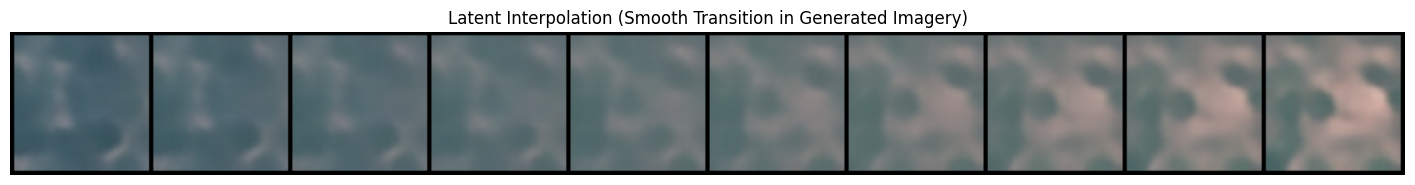

In [40]:
def interpolate(z1, z2, steps=8):
    alphas = torch.linspace(0, 1, steps).to(device)
    zs = torch.stack([(1-a)*z1 + a*z2 for a in alphas], dim=0)
    return zs

with torch.no_grad():
    z1 = torch.randn(model.latent_dim).to(device)
    z2 = torch.randn(model.latent_dim).to(device)
    zs = interpolate(z1, z2, steps=10)
    inter_samples = model.decode(zs).cpu()

grid = make_grid(inter_samples, nrow=10)

plt.figure(figsize=(18, 2.5))
plt.imshow(grid.permute(1, 2, 0))
plt.axis("off")
plt.title("Latent Interpolation (Smooth Transition in Generated Imagery)")
plt.show()


## 5.4 Qualitative Evaluation of Output Quality and Strengths and Failure Cases

Reconstructed images preserve global color structure and large terrain regions, indicating that the encoder captures meaningful spatial statistics of satellite imagery. Water-dominated regions, vegetation tones, and arid textures remain recognizable after reconstruction. However, fine-grained details such as sharp edges, small roads, and building structures are blurred. This smoothing effect is a known characteristic of VAEs trained with pixel-level reconstruction objectives, where the model averages uncertain high-frequency details.

Synthetic samples generated from random latent vectors resemble plausible Earth-surface textures. While they do not correspond to specific semantic classes, they exhibit consistent color distributions and spatial coherence typical of satellite imagery. No visual artifacts such as noise explosions or checkerboard patterns are observed, suggesting stable decoding.

Latent interpolation produces smooth visual transitions without abrupt discontinuities, demonstrating that the learned latent space is continuous and structured. This behavior confirms that the VAE has learned a meaningful generative manifold rather than memorizing individual training examples.

Overall, the model successfully captures coarse terrain statistics and produces stable generative outputs, but it is limited in high-frequency detail and semantic precision.


# **6. Summary**

This project implemented a convolutional β-Variational Autoencoder to model and generate 64×64 RGB satellite imagery from the EuroSAT dataset.

The trained model produces visually coherent synthetic textures and preserves global terrain color structure, while latent interpolation confirms a continuous and structured generative space.

Training remained stable with early stopping and checkpointing, though balancing reconstruction fidelity against KL regularization required tuning of the β parameter.

The primary limitation is blur and loss of fine spatial detail, a known effect of pixel-level VAE reconstruction objectives.

Despite this limitation, the model successfully captures coarse terrain statistics and demonstrates stable generative behavior suitable for qualitative simulation of satellite imagery.


In [41]:
pip freeze > requirements.txt